*QUESTION 5*

In [2]:
import pandas as pd

In [23]:
grocery_data_path = 'grocery data\Groceries_dataset.csv'
grocery_data = pd.read_csv(grocery_data_path)

grocery_data['Date'] = pd.to_datetime(grocery_data['Date'], format='%d-%m-%Y')

print(grocery_data.head())
print(f"Transaction Info : {grocery_data.shape}")

   Member_number       Date   itemDescription
0           1808 2015-07-21    tropical fruit
1           2552 2015-01-05        whole milk
2           2300 2015-09-19         pip fruit
3           1187 2015-12-12  other vegetables
4           3037 2015-02-01        whole milk
Transaction Info : (38765, 3)


In [13]:
def individual_itemset(data):
    unique_items = set(data['itemDescription'])
    print(f"Total Unique Items : {len(unique_items)}")
    print(f"Unique Items : {unique_items}")
    return unique_items

unique_items = individual_itemset(grocery_data)

Total Unique Items : 167
Unique Items : {'flour', 'frozen chicken', 'bathroom cleaner', 'citrus fruit', 'sugar', 'sliced cheese', 'specialty cheese', 'snack products', 'baking powder', 'frozen dessert', 'potato products', 'yogurt', 'canned beer', 'frozen potato products', 'other vegetables', 'flower (seeds)', 'popcorn', 'sweet spreads', 'softener', 'canned vegetables', 'dessert', 'artif. sweetener', 'ham', 'dish cleaner', 'meat', 'prosecco', 'cat food', 'cookware', 'meat spreads', 'sausage', 'frankfurter', 'vinegar', 'brandy', 'organic sausage', 'candy', 'misc. beverages', 'coffee', 'dog food', 'pet care', 'frozen fruits', 'male cosmetics', 'skin care', 'liver loaf', 'mustard', 'specialty fat', 'hard cheese', 'sauces', 'detergent', 'kitchen utensil', 'photo/film', 'long life bakery product', 'cereals', 'liquor (appetizer)', 'dishes', 'hamburger meat', 'white bread', 'red/blush wine', 'chocolate', 'spices', 'whole milk', 'chicken', 'rum', 'specialty vegetables', 'processed cheese', 'ber

In [22]:
df = grocery_data["itemDescription"].value_counts()[:20].reset_index()
df.columns = ["Category", "Count"]
print(df)

              Category  Count
0           whole milk   2502
1     other vegetables   1898
2           rolls/buns   1716
3                 soda   1514
4               yogurt   1334
5      root vegetables   1071
6       tropical fruit   1032
7        bottled water    933
8              sausage    924
9         citrus fruit    812
10              pastry    785
11           pip fruit    744
12       shopping bags    731
13         canned beer    717
14        bottled beer    687
15  whipped/sour cream    662
16          newspapers    596
17         frankfurter    580
18         brown bread    571
19                pork    566


In [24]:
grocery_data["Single_transaction"] = grocery_data["Member_number"].astype(str) + "_" + grocery_data["Date"].astype(str)

print(grocery_data.head())

   Member_number       Date   itemDescription Single_transaction
0           1808 2015-07-21    tropical fruit    1808_2015-07-21
1           2552 2015-01-05        whole milk    2552_2015-01-05
2           2300 2015-09-19         pip fruit    2300_2015-09-19
3           1187 2015-12-12  other vegetables    1187_2015-12-12
4           3037 2015-02-01        whole milk    3037_2015-02-01


In [28]:
transaction_data = grocery_data.groupby("Single_transaction")["itemDescription"].apply(list).tolist()
print(transaction_data[:5])

[['whole milk', 'pastry', 'salty snack'], ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'], ['soda', 'pickled vegetables'], ['canned beer', 'misc. beverages'], ['sausage', 'hygiene articles']]


In [34]:
import numpy as np
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transaction_data).transform(transaction_data)
df = pd.DataFrame(te_ary, columns=te.columns_)
print(df.head())
print(df.sum())

   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    False   
1           False  False          False             False  False    False   
2           False  False          False             False  False    False   
3           False  False          False             False  False    False   
4           False  False          False             False  False    False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False 

In [53]:
from mlxtend.frequent_patterns import apriori

apriori_data = apriori(df, min_support=0.01, use_colnames=True)
print(apriori_data)

     support                        itemsets
0   0.021386                      (UHT-milk)
1   0.033950                          (beef)
2   0.021787                       (berries)
3   0.016574                     (beverages)
4   0.045312                  (bottled beer)
..       ...                             ...
64  0.010559  (rolls/buns, other vegetables)
65  0.014837  (whole milk, other vegetables)
66  0.013968        (rolls/buns, whole milk)
67  0.011629              (soda, whole milk)
68  0.011161            (yogurt, whole milk)

[69 rows x 2 columns]


In [55]:
from mlxtend.frequent_patterns import association_rules

association_data = association_rules(apriori_data, metric="confidence", min_threshold=0.01)
print(association_data)

          antecedents         consequents  antecedent support  \
0        (rolls/buns)  (other vegetables)            0.110005   
1  (other vegetables)        (rolls/buns)            0.122101   
2        (whole milk)  (other vegetables)            0.157923   
3  (other vegetables)        (whole milk)            0.122101   
4        (rolls/buns)        (whole milk)            0.110005   
5        (whole milk)        (rolls/buns)            0.157923   
6              (soda)        (whole milk)            0.097106   
7        (whole milk)              (soda)            0.157923   
8            (yogurt)        (whole milk)            0.085879   
9        (whole milk)            (yogurt)            0.157923   

   consequent support   support  confidence      lift  representativity  \
0            0.122101  0.010559    0.095990  0.786154               1.0   
1            0.110005  0.010559    0.086481  0.786154               1.0   
2            0.122101  0.014837    0.093948  0.769430      

In [58]:
filtered_data = association_data[(association_data['confidence'] > 0.1) & (association_data['lift'] > 0.8)]
print(filtered_data)

    antecedents   consequents  antecedent support  consequent support  \
4  (rolls/buns)  (whole milk)            0.110005            0.157923   
8      (yogurt)  (whole milk)            0.085879            0.157923   

    support  confidence      lift  representativity  leverage  conviction  \
4  0.013968    0.126974  0.804028               1.0 -0.003404    0.964550   
8  0.011161    0.129961  0.822940               1.0 -0.002401    0.967861   

   zhangs_metric   jaccard  certainty  kulczynski  
4      -0.214986  0.055000  -0.036752    0.107711  
8      -0.190525  0.047975  -0.033206    0.100317  


*QUESTION 6*

In [16]:
movie_data_path = 'movie rating data\\ratings_small.csv'
movie_data = pd.read_csv(movie_data_path)
movie_data.drop('timestamp', axis=1, inplace=True)
unique_movies = movie_data['movieId'].unique()
uniique_users = movie_data['userId'].unique()

print(movie_data.head())
print(f'SHAPE : {movie_data.shape}')
print(f'DESCRIPTION : \n{movie_data.describe()}')
print(f'INFO : \n{movie_data.info()}')
print(f'Total Unique Movies : {len(unique_movies)}')
print(f'Total Unique Users : {len(uniique_users)}')

   userId  movieId  rating
0       1       31     2.5
1       1     1029     3.0
2       1     1061     3.0
3       1     1129     2.0
4       1     1172     4.0
SHAPE : (100004, 3)
DESCRIPTION : 
              userId        movieId         rating
count  100004.000000  100004.000000  100004.000000
mean      347.011310   12548.664363       3.543608
std       195.163838   26369.198969       1.058064
min         1.000000       1.000000       0.500000
25%       182.000000    1028.000000       3.000000
50%       367.000000    2406.500000       4.000000
75%       520.000000    5418.000000       4.000000
max       671.000000  163949.000000       5.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100004 non-null  int64  
 1   movieId  100004 non-null  int64  
 2   rating   100004 non-null  float64
dtypes: float64(1), int64(2)
memory usa

In [ ]:
active_users = movie_data['userId'].value_counts().head(1000).index
popular_movies = movie_data['movieId'].value_counts().head(1000).index

subset_data = movie_data[movie_data['userId'].isin(active_users) & movie_data['movieId'].isin(popular_movies)]
print(subset_data.head())
print(f'SHAPE : {subset_data.shape}')

671
   userId  movieId  rating
0       1       31     2.5
1       1     1029     3.0
2       1     1061     3.0
3       1     1129     2.0
4       1     1172     4.0
SHAPE : (62397, 3)


In [24]:
user_movie_matrix = subset_data.pivot_table(index='userId', columns='movieId', values='rating')
user_movie_matrix.fillna(0, inplace=True)
print(user_movie_matrix.head())

movieId  1       2       3       5       6       7       10      11      \
userId                                                                    
1           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     4.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     4.0     0.0   
5           0.0     0.0     4.0     0.0     0.0     0.0     0.0     0.0   

movieId  14      16      ...  106920  109374  109487  111759  112552  112852  \
userId                   ...                                                   
1           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

user_similarity_matrix = cosine_similarity(user_movie_matrix)
np.fill_diagonal(user_similarity_matrix, 0)
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_movie_matrix.index, columns=user_movie_matrix.index)
print(user_similarity_df.head())

userId       1         2         3         4         5         6         7    \
userId                                                                         
1       0.000000  0.000000  0.000000  0.085142  0.016905  0.000000  0.085997   
2       0.000000  0.000000  0.146985  0.143051  0.109724  0.000000  0.229968   
3       0.000000  0.146985  0.000000  0.104785  0.171020  0.069457  0.178091   
4       0.085142  0.143051  0.104785  0.000000  0.150117  0.092800  0.368138   
5       0.016905  0.109724  0.171020  0.150117  0.000000  0.065360  0.098811   

userId       8         9         10   ...       662       663       664  \
userId                                ...                                 
1       0.000000  0.013781  0.000000  ...  0.000000  0.000000  0.018491   
2       0.123408  0.128084  0.056379  ...  0.511752  0.122564  0.104607   
3       0.277715  0.162022  0.126357  ...  0.184262  0.132724  0.252653   
4       0.226033  0.037311  0.194262  ...  0.133033  0.099404  0

In [34]:
print(user_similarity_df.index.max())

random_user = np.random.choice(user_movie_matrix.index)
print(random_user)

671
236


In [35]:
def get_top_similar_users(userId, user_similarity_df, threshold = 0, n =10):
    user_similarity_scores = user_similarity_df.iloc[userId, :]
    if threshold > 0:
        similar_users = user_similarity_scores[user_similarity_scores > threshold].sort_values(ascending=False). head(n)
    else:
        similar_users = user_similarity_scores.sort_values(ascending=False).head(n)
    return similar_users

In [43]:
similar_users = get_top_similar_users(random_user, user_similarity_df, threshold=0, n=10)
print(similar_users)
type(similar_users)
similar_users.index.to_list()

userId
657    0.404453
168    0.361717
7      0.344083
400    0.342127
345    0.334379
568    0.334256
659    0.334083
410    0.332526
448    0.326871
449    0.322821
Name: 237, dtype: float64


[657, 168, 7, 400, 345, 568, 659, 410, 448, 449]

In [46]:
similar_user_ratings = movie_data[movie_data['userId'].isin(similar_users.index.to_list())]
print(similar_user_ratings.head())

     userId  movieId  rating
495       7        1     3.0
496       7       10     3.0
497       7       21     3.0
498       7       31     3.0
499       7       34     4.0


In [47]:
# Candidate scoring: 
# Add up ratings for each item, weighted by user similarity
from collections import defaultdict
scores=defaultdict(float)
for index, similar_user_rating in similar_user_ratings.iterrows():
    movie_id = similar_user_rating['movieId']
    user_rating = similar_user_rating['rating']
    user_id = similar_user_rating['userId']
    user_similarity_score = similar_users[int(user_id)]
    scores[int(movie_id)] += (user_rating / 5.0) * user_similarity_score

In [48]:
movie_data.loc[movie_data['userId'] == random_user].sort_values(by='rating', ascending=False).head(10)

,userId,movieId,rating
32653,236,903,5.0
32654,236,904,5.0
32657,236,910,5.0
32648,236,750,5.0
32702,236,1260,5.0
32703,236,1281,5.0
32700,236,1251,5.0
32721,236,2019,5.0
32676,236,955,5.0
32682,236,1178,5.0


In [49]:
watched = {}
for index, row in movie_data.loc[movie_data['userId'] == random_user].iterrows():
    watched[row['movieId']] = row['rating']

In [50]:
from operator import itemgetter

recommendations = {}
pos = 0

for movie, score in sorted(scores.items(), key=itemgetter(1), reverse=True):
    if movie not in watched:
        recommendations[movie] = score
        pos += 1
    if pos >= 10:
        break

for recommendation, score in recommendations.items():
    print(f"Movie : {recommendation} , Score : {score}")

Movie : 318 , Score : 2.815029411872117
Movie : 356 , Score : 2.4318482427414803
Movie : 380 , Score : 2.201285318331283
Movie : 592 , Score : 2.031444703626953
Movie : 457 , Score : 1.8109796587926363
Movie : 377 , Score : 1.7372549924107326
Movie : 110 , Score : 1.7371568374488855
Movie : 589 , Score : 1.6963092147918335
Movie : 608 , Score : 1.6939478633199108
Movie : 150 , Score : 1.6795298776784282


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the data
data_path = "movie rating data/ratings_small.csv"
movie_data = pd.read_csv(data_path)

# Drop the timestamp column
movie_data.drop("timestamp", axis=1, inplace=True)

# Split the data into training and test sets
train_data, test_data = train_test_split(movie_data, test_size=0.2, random_state=42)

# Create a user-item matrix for training
train_user_item_matrix = train_data.pivot(index="userId", columns="movieId", values="rating").fillna(0)

# Calculate user similarity using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
user_similarity_matrix = cosine_similarity(train_user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=train_user_item_matrix.index, columns=train_user_item_matrix.index)

# Generate recommendations for users in the test set
def recommend_movies(user_id, user_similarity_df, train_user_item_matrix, top_n=10):
    if user_id not in user_similarity_df.index:
        return []  # No recommendations for users not in the training set
    similar_users = user_similarity_df.loc[user_id].sort_values(ascending=False).index
    scores = train_user_item_matrix.loc[similar_users].sum(axis=0)
    scores = scores.sort_values(ascending=False)
    recommended_movies = scores.index[:top_n]
    return recommended_movies

# Evaluate the recommendations
precision_list = []
recall_list = []
f1_list = []

for user_id in test_data["userId"].unique():
    # Ground truth: Movies the user interacted with in the test set
    ground_truth = test_data[test_data["userId"] == user_id]["movieId"].tolist()
    
    # Predicted: Top-N recommended movies
    if user_id in train_user_item_matrix.index:
        recommendations = recommend_movies(user_id, user_similarity_df, train_user_item_matrix, top_n=10)
    else:
        recommendations = []  # No recommendations for users not in the training set

    # Calculate precision, recall, and F1-score for this user
    if len(ground_truth) > 0:  # Avoid division by zero
        true_positives = len(set(recommendations) & set(ground_truth))
        precision = true_positives / len(recommendations) if len(recommendations) > 0 else 0
        recall = true_positives / len(ground_truth)
        f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

# Calculate average metrics across all users
average_precision = sum(precision_list) / len(precision_list) if len(precision_list) > 0 else 0
average_recall = sum(recall_list) / len(recall_list) if len(recall_list) > 0 else 0
average_f1 = sum(f1_list) / len(f1_list) if len(f1_list) > 0 else 0

print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1-score: {average_f1:.4f}")

Average Precision: 0.0811
Average Recall: 0.0481
Average F1-score: 0.0492


In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load the data
data_path = "movie rating data/ratings_small.csv"
movie_data = pd.read_csv(data_path)

# Drop the timestamp column
movie_data.drop("timestamp", axis=1, inplace=True)

# Split the data into training and test sets
train_data, test_data = train_test_split(movie_data, test_size=0.2, random_state=42)

# Create an item-user matrix for training
train_item_user_matrix = train_data.pivot(index="movieId", columns="userId", values="rating").fillna(0)

# Calculate item similarity using cosine similarity
item_similarity_matrix = cosine_similarity(train_item_user_matrix)
item_similarity_df = pd.DataFrame(item_similarity_matrix, index=train_item_user_matrix.index, columns=train_item_user_matrix.index)

# Predict ratings for a user
def predict_ratings(user_id, train_item_user_matrix, item_similarity_df, top_n=10):
    if user_id not in train_item_user_matrix.columns:
        return []  # No recommendations for users not in the training set
    
    user_ratings = train_item_user_matrix[user_id]
    
    # Compute scores for items
    scores = item_similarity_df.dot(user_ratings) / np.abs(item_similarity_df).sum(axis=1)
    scores = pd.Series(scores, index=train_item_user_matrix.index)
    
    # Exclude items the user has already rated
    rated_items = user_ratings[user_ratings > 0].index
    scores = scores.drop(index=rated_items)
    
    # Recommend top-N items
    recommended_items = scores.sort_values(ascending=False).head(top_n).index.tolist()
    return recommended_items

# Evaluate the recommendations
precision_list = []
recall_list = []
f1_list = []

for user_id in test_data["userId"].unique():
    # Ground truth: Movies the user interacted with in the test set
    ground_truth = test_data[test_data["userId"] == user_id]["movieId"].tolist()
    
    # Predicted: Top-N recommended movies
    recommendations = predict_ratings(user_id, train_item_user_matrix, item_similarity_df, top_n=10)
    
    # Calculate precision, recall, and F1-score for this user
    if len(ground_truth) > 0:  # Avoid division by zero
        true_positives = len(set(recommendations) & set(ground_truth))
        precision = true_positives / len(recommendations) if len(recommendations) > 0 else 0
        recall = true_positives / len(ground_truth)
        f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

# Calculate average metrics across all users
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)

print(f"Precision: {average_precision:.4f}")
print(f"Recall: {average_recall:.4f}")
print(f"F1-score: {average_f1:.4f}")

Precision: 0.0033
Recall: 0.0008
F1-score: 0.0011


*QUESTION 7*

State: [0 0], Reward: -0.1, Done: False


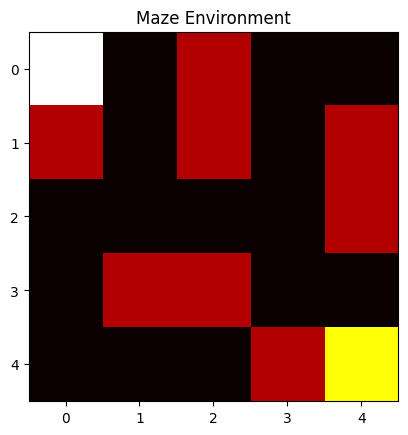

State: [0 0], Reward: -0.1, Done: False


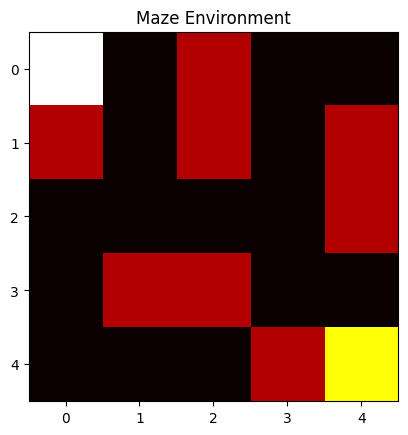

State: [0 0], Reward: -0.1, Done: False


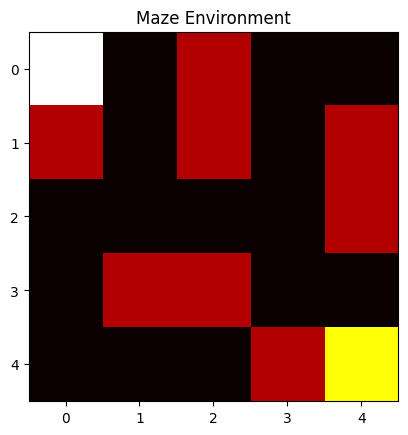

State: [0 1], Reward: -0.1, Done: False


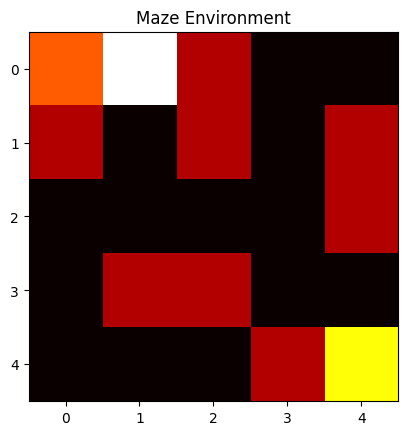

State: [0 0], Reward: -0.1, Done: False


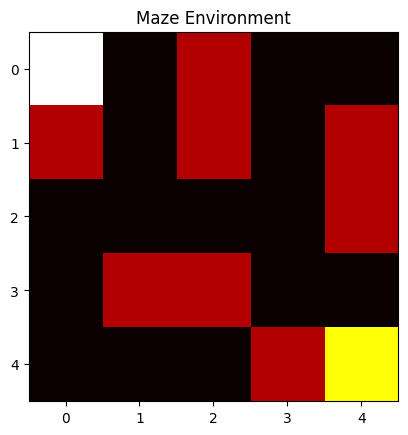

State: [0 0], Reward: -0.1, Done: False


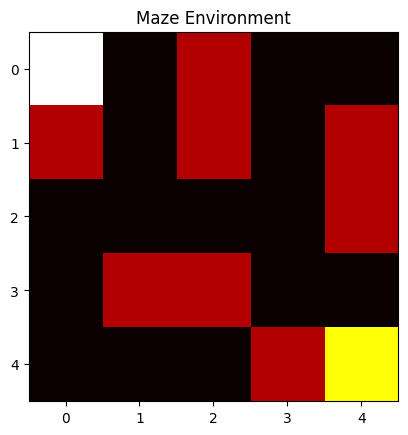

State: [0 0], Reward: -0.1, Done: False


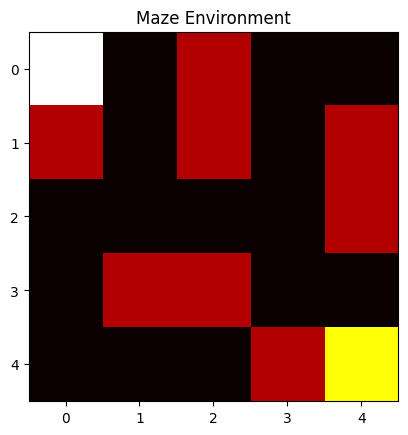

State: [0 0], Reward: -0.1, Done: False


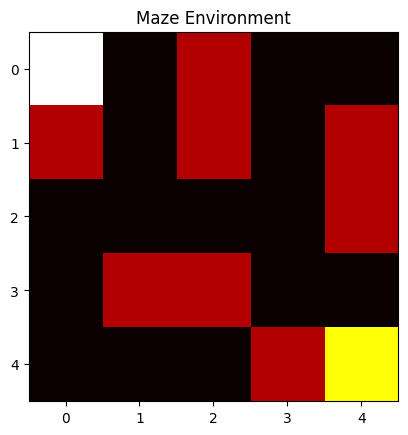

State: [0 0], Reward: -0.1, Done: False


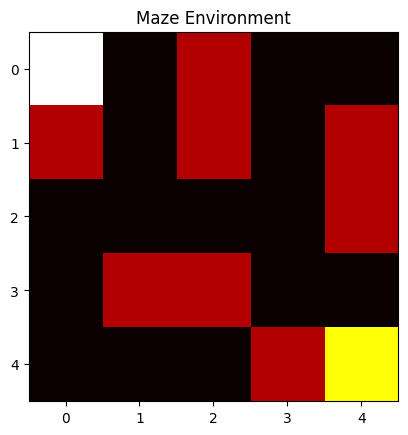

State: [0 0], Reward: -0.1, Done: False


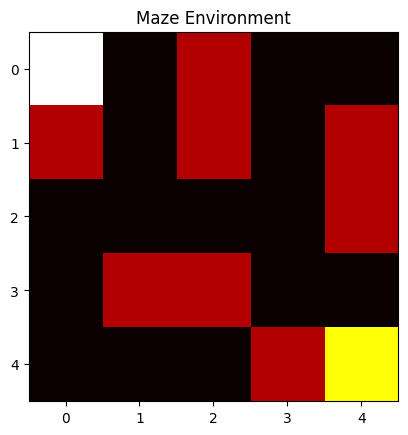

State: [0 1], Reward: -0.1, Done: False


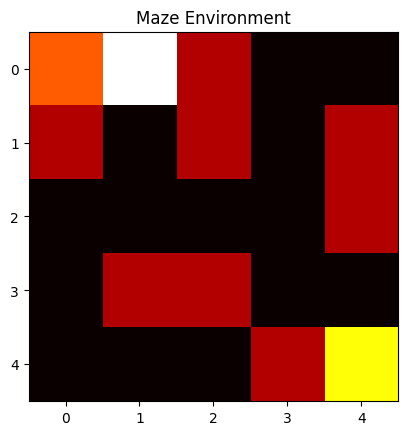

State: [0 0], Reward: -0.1, Done: False


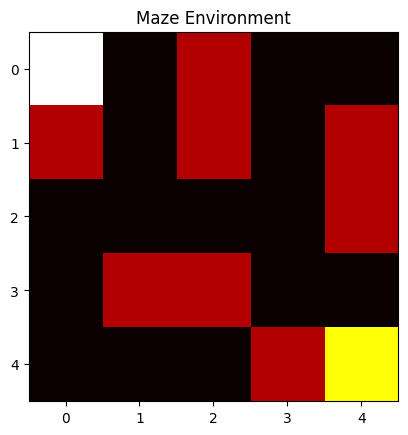

State: [0 0], Reward: -0.1, Done: False


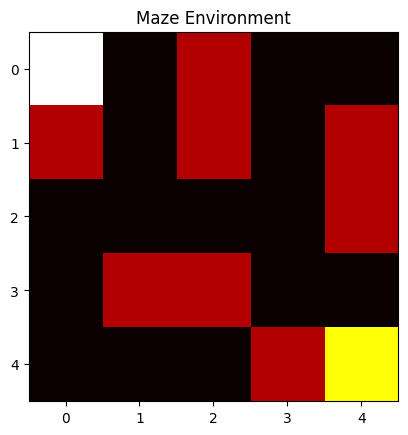

State: [0 0], Reward: -0.1, Done: False


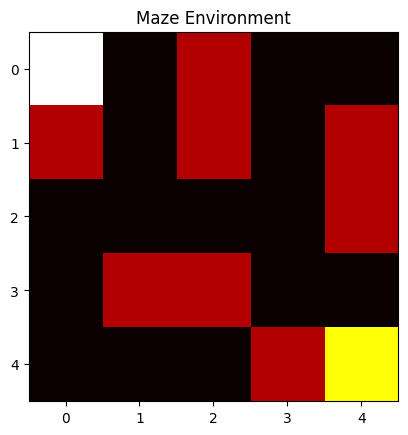

State: [0 0], Reward: -0.1, Done: False


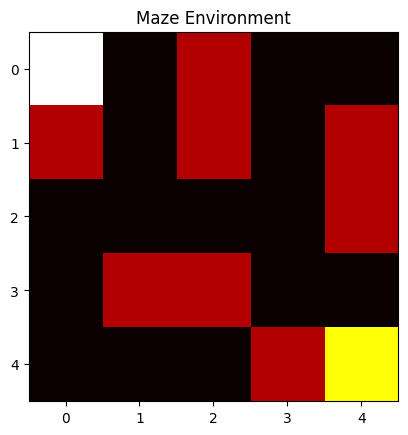

State: [0 1], Reward: -0.1, Done: False


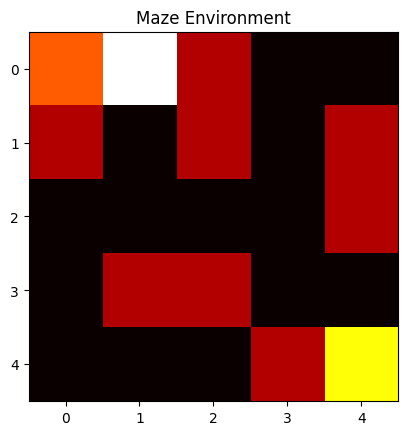

State: [0 1], Reward: -0.1, Done: False


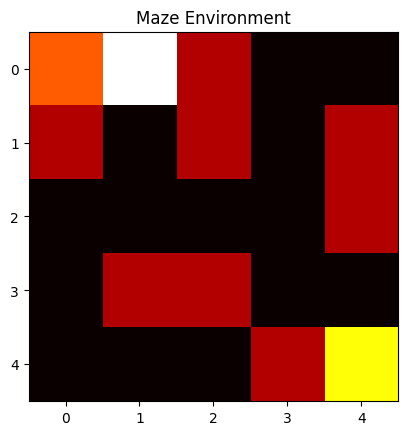

State: [0 1], Reward: -0.1, Done: False


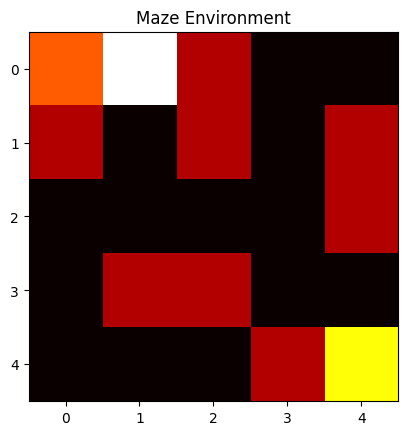

State: [0 1], Reward: -0.1, Done: False


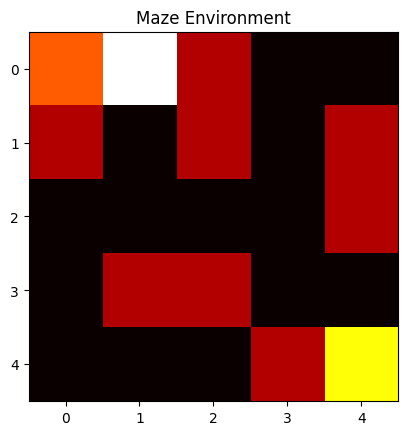

State: [0 1], Reward: -0.1, Done: False


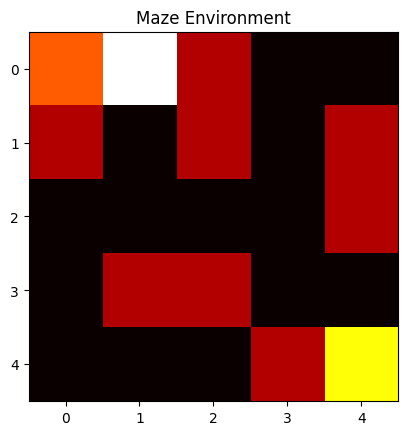

State: [0 1], Reward: -0.1, Done: False


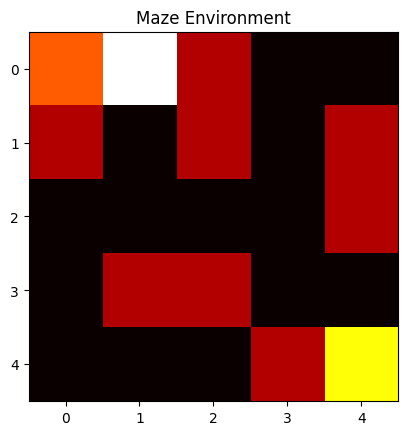

State: [1 1], Reward: -0.1, Done: False


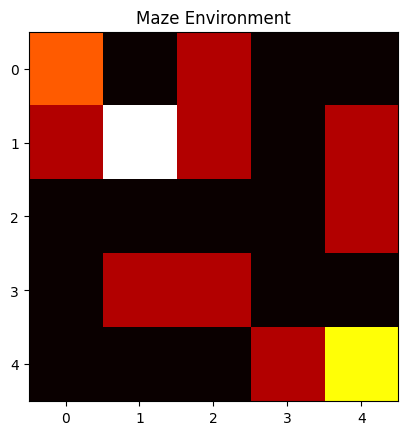

State: [2 1], Reward: -0.1, Done: False


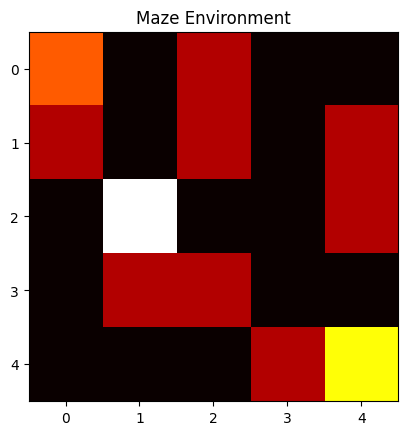

State: [1 1], Reward: -0.1, Done: False


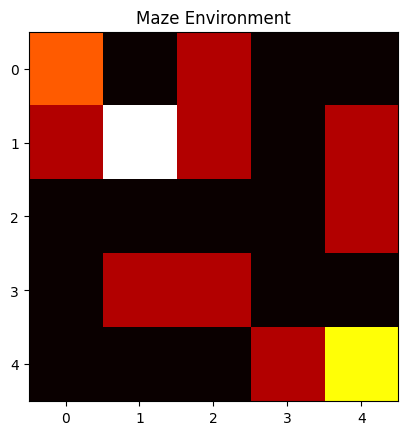

State: [1 1], Reward: -0.1, Done: False


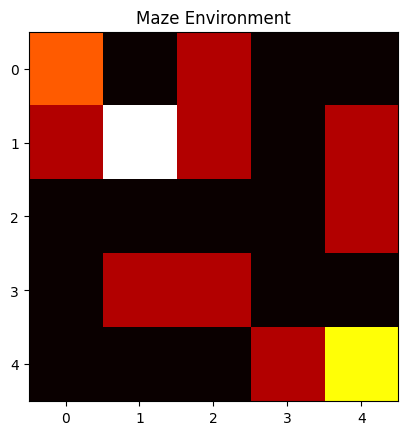

State: [1 1], Reward: -0.1, Done: False


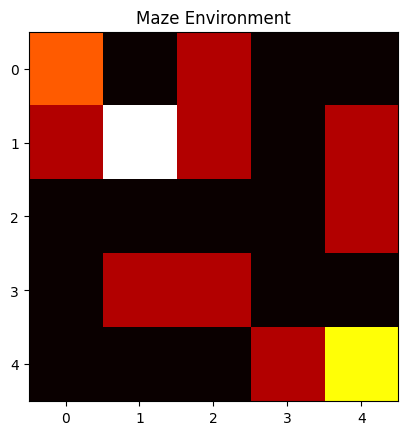

State: [2 1], Reward: -0.1, Done: False


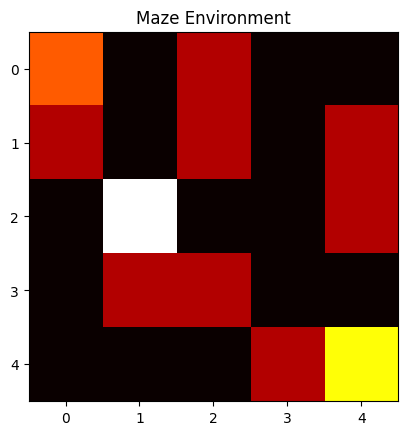

State: [2 2], Reward: -0.1, Done: False


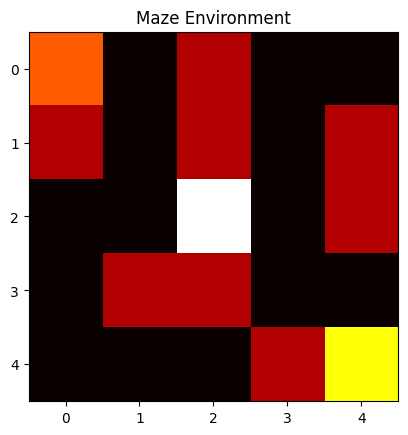

State: [2 2], Reward: -0.1, Done: False


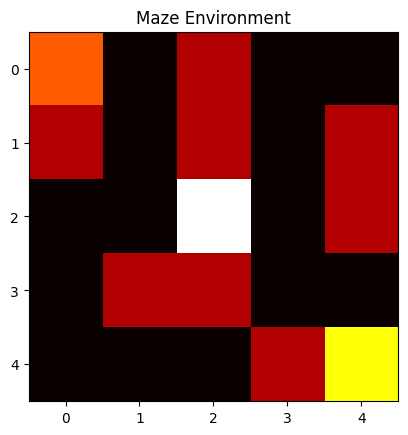

State: [2 3], Reward: -0.1, Done: False


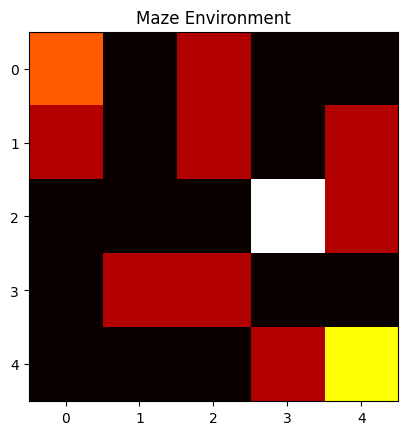

State: [2 2], Reward: -0.1, Done: False


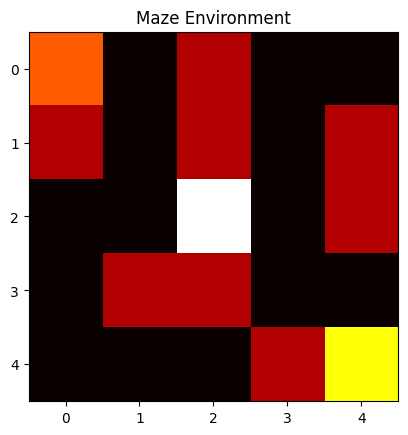

State: [2 1], Reward: -0.1, Done: False


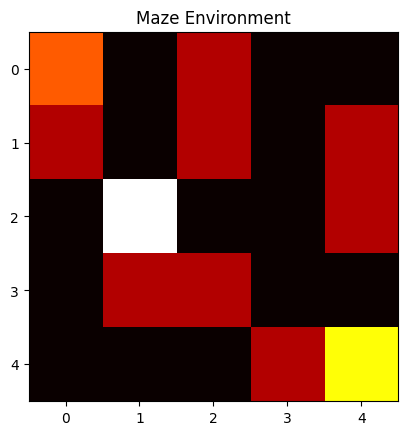

State: [2 2], Reward: -0.1, Done: False


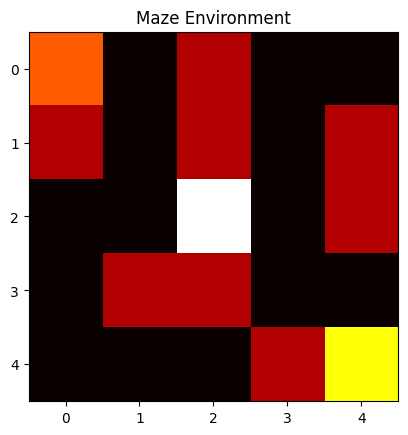

State: [2 3], Reward: -0.1, Done: False


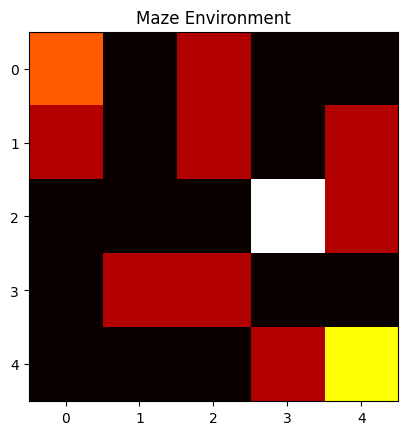

State: [2 2], Reward: -0.1, Done: False


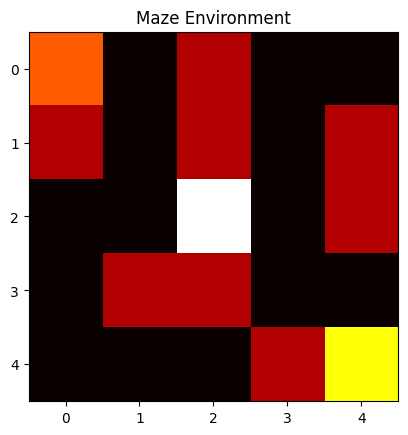

State: [2 2], Reward: -0.1, Done: False


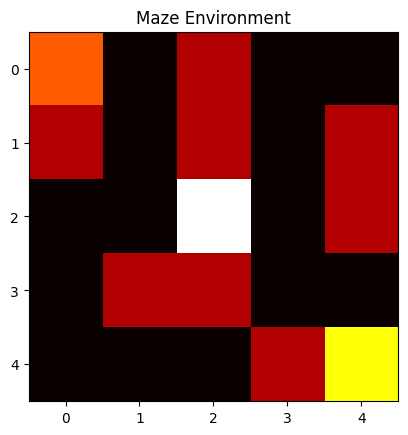

State: [2 1], Reward: -0.1, Done: False


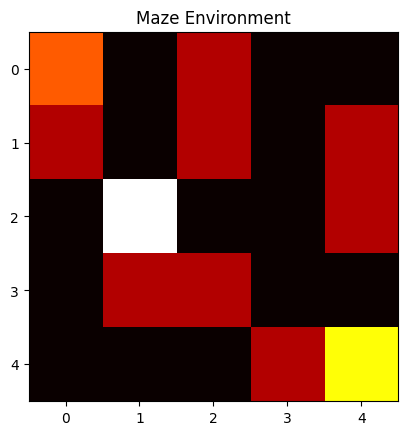

State: [2 2], Reward: -0.1, Done: False


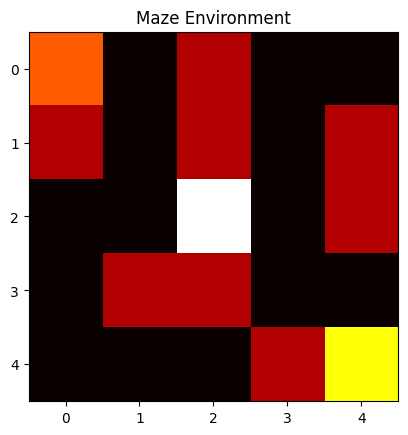

State: [2 1], Reward: -0.1, Done: False


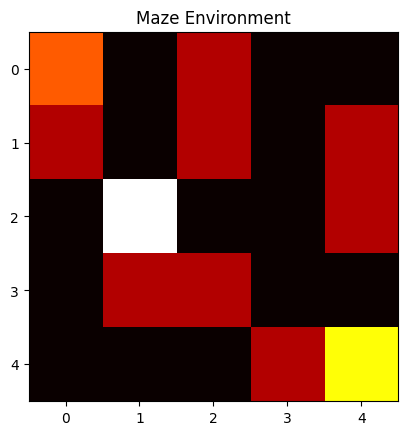

State: [2 2], Reward: -0.1, Done: False


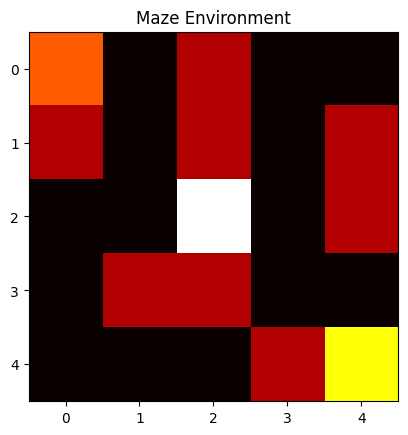

State: [2 1], Reward: -0.1, Done: False


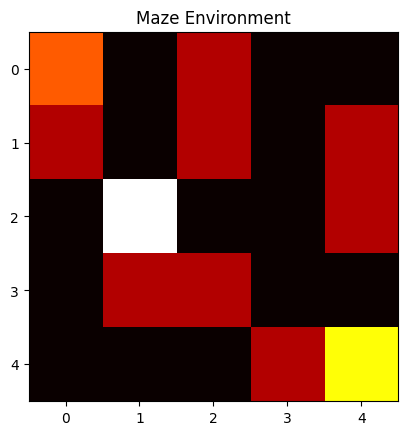

State: [2 0], Reward: -0.1, Done: False


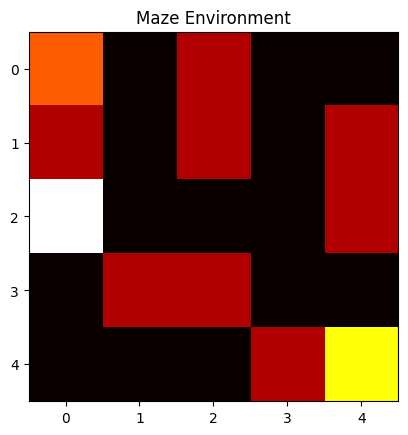

State: [2 0], Reward: -0.1, Done: False


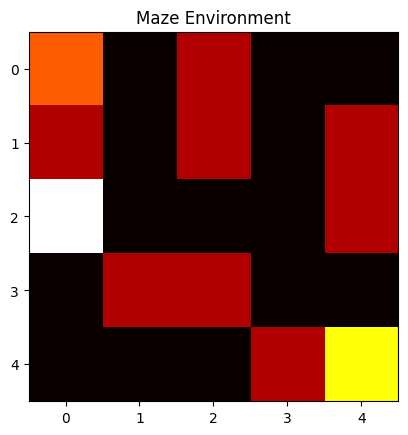

State: [2 0], Reward: -0.1, Done: False


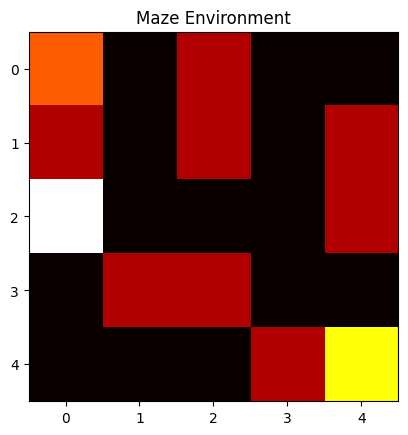

State: [3 0], Reward: -0.1, Done: False


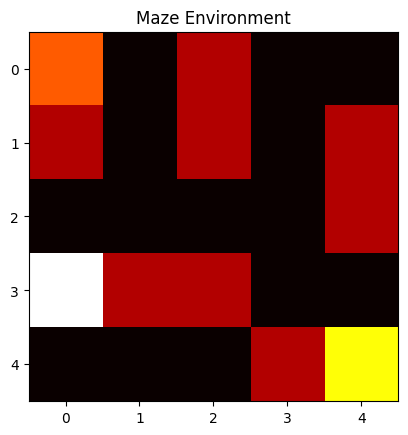

State: [4 0], Reward: -0.1, Done: False


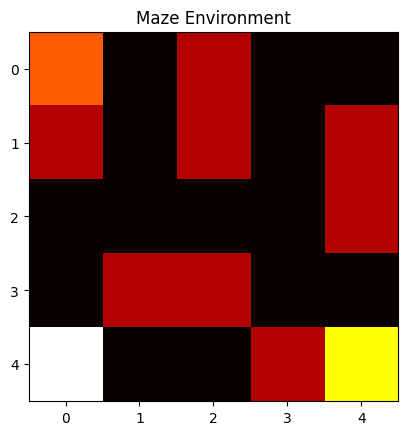

State: [4 0], Reward: -0.1, Done: False


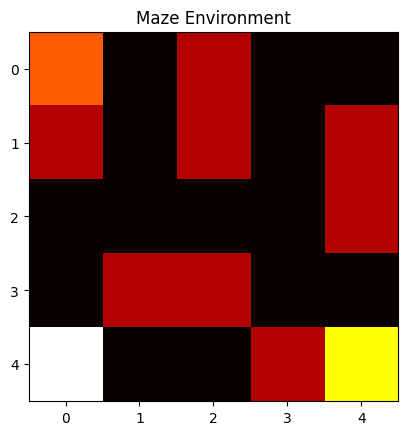

State: [4 0], Reward: -0.1, Done: False


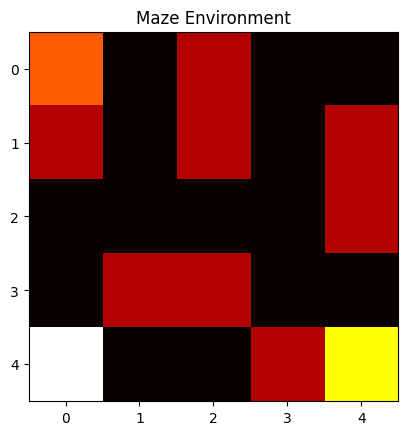

State: [3 0], Reward: -0.1, Done: False


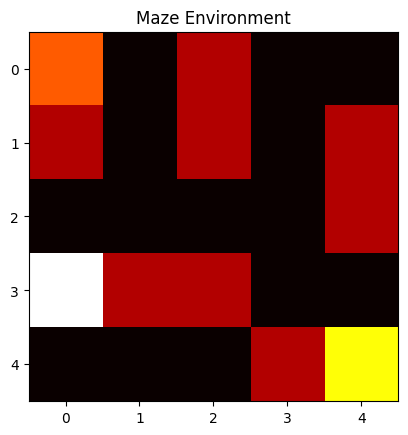

State: [3 0], Reward: -0.1, Done: False


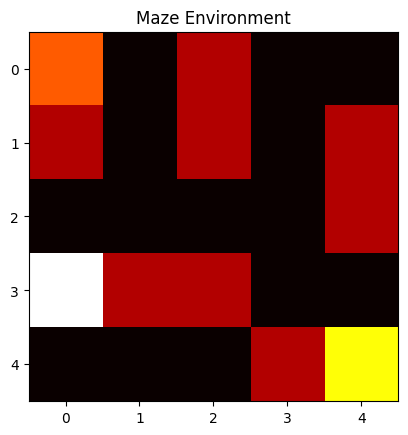

In [4]:
import numpy as np
import gym
from gym import spaces
import matplotlib.pyplot as plt

class CustomMazeEnv(gym.Env):
    def __init__(self, maze):
        super(CustomMazeEnv, self).__init__()
        self.maze = np.array(maze)
        self.start_pos = tuple(np.argwhere(self.maze == 2)[0])
        self.goal_pos = tuple(np.argwhere(self.maze == 3)[0])
        self.action_space = spaces.Discrete(4)  # 0: up, 1: right, 2: down, 3: left
        self.observation_space = spaces.Box(low=0, high=max(self.maze.shape), shape=(2,), dtype=np.int32)
        self.agent_pos = self.start_pos

    def reset(self):
        self.agent_pos = self.start_pos
        return np.array(self.agent_pos, dtype=np.int32)

    def step(self, action):
        directions = {0: (-1, 0), 1: (0, 1), 2: (1, 0), 3: (0, -1)}
        new_pos = (self.agent_pos[0] + directions[action][0], self.agent_pos[1] + directions[action][1])
        if (0 <= new_pos[0] < self.maze.shape[0] and
            0 <= new_pos[1] < self.maze.shape[1] and
            self.maze[new_pos] != 1):
            self.agent_pos = new_pos
        done = self.agent_pos == self.goal_pos
        reward = 1 if done else -0.1
        return np.array(self.agent_pos, dtype=np.int32), reward, done, {}

    def render(self):
        maze_render = self.maze.copy()
        maze_render[self.agent_pos] = 4
        plt.imshow(maze_render, cmap='hot', interpolation='nearest')
        plt.title("Maze Environment")
        plt.show()

# Define the maze
maze = [
    [2, 0, 1, 0, 0],
    [1, 0, 1, 0, 1],
    [0, 0, 0, 0, 1],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 1, 3]
]

# Create the environment
env = CustomMazeEnv(maze)

# Test the environment
state = env.reset()
done = False
max_steps = 50  # Limit the number of steps to prevent infinite loops

for _ in range(max_steps):
    if done:
        break
    action = env.action_space.sample()  # Random action
    state, reward, done, _ = env.step(action)
    print(f"State: {state}, Reward: {reward}, Done: {done}")
    env.render()

Episode 100/1000, Total Reward: -0.09999999999999987, Epsilon: 0.6058
Episode 200/1000, Total Reward: 0.10000000000000009, Epsilon: 0.3670
Episode 300/1000, Total Reward: 1.1102230246251565e-16, Epsilon: 0.2223
Episode 400/1000, Total Reward: -0.19999999999999996, Epsilon: 0.1347
Episode 500/1000, Total Reward: 0.30000000000000004, Epsilon: 0.0816
Episode 600/1000, Total Reward: 0.30000000000000004, Epsilon: 0.0494
Episode 700/1000, Total Reward: 0.30000000000000004, Epsilon: 0.0299
Episode 800/1000, Total Reward: 0.30000000000000004, Epsilon: 0.0181
Episode 900/1000, Total Reward: 0.30000000000000004, Epsilon: 0.0110
Episode 1000/1000, Total Reward: 0.30000000000000004, Epsilon: 0.0100


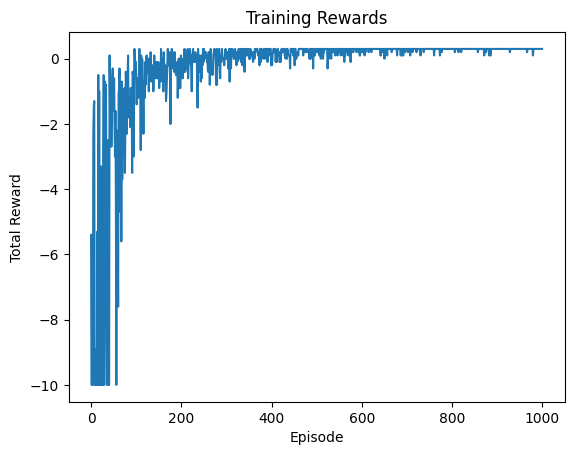

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Q-learning agent
class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.99, epsilon=1.0, epsilon_decay=0.995, min_epsilon=0.01):
        self.env = env
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.q_table = np.zeros((env.maze.shape[0], env.maze.shape[1], env.action_space.n))  # Q-table

    def choose_action(self, state):
        # Epsilon-greedy strategy
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()  # Explore: random action
        else:
            return np.argmax(self.q_table[state[0], state[1]])  # Exploit: best action

    def update_q_value(self, state, action, reward, next_state, done):
        # Update Q-value using the Q-learning formula
        best_next_action = np.argmax(self.q_table[next_state[0], next_state[1]])
        td_target = reward + (self.discount_factor * self.q_table[next_state[0], next_state[1], best_next_action] * (1 - done))
        td_error = td_target - self.q_table[state[0], state[1], action]
        self.q_table[state[0], state[1], action] += self.learning_rate * td_error

    def decay_epsilon(self):
        # Decay epsilon after each episode
        self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)

# Train the Q-learning agent
def train_agent(env, agent, episodes=1000, max_steps=100):
    rewards = []

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0

        for step in range(max_steps):
            action = agent.choose_action(state)
            next_state, reward, done, _ = env.step(action)
            agent.update_q_value(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward

            if done:
                break

        agent.decay_epsilon()
        rewards.append(total_reward)

        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}, Epsilon: {agent.epsilon:.4f}")

    return rewards

# Plot the rewards
def plot_rewards(rewards):
    plt.plot(rewards)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Training Rewards")
    plt.show()

# Define the maze
maze = [
    [2, 0, 1, 0, 0],
    [1, 0, 1, 0, 1],
    [0, 0, 0, 0, 1],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 1, 3]
]

# Create the environment
env = CustomMazeEnv(maze)

# Initialize the Q-learning agent
agent = QLearningAgent(env)

# Train the agent
rewards = train_agent(env, agent, episodes=1000, max_steps=100)

# Plot the training rewards
plot_rewards(rewards)

Episode 100/1000, Total Reward: -3.8999999999999986, Epsilon: 0.6058
Episode 200/1000, Total Reward: -0.5000000000000002, Epsilon: 0.3670
Episode 300/1000, Total Reward: -0.40000000000000013, Epsilon: 0.2223
Episode 400/1000, Total Reward: 0.20000000000000007, Epsilon: 0.1347
Episode 500/1000, Total Reward: 0.30000000000000004, Epsilon: 0.0816
Episode 600/1000, Total Reward: 0.30000000000000004, Epsilon: 0.0494
Episode 700/1000, Total Reward: 0.20000000000000007, Epsilon: 0.0299
Episode 800/1000, Total Reward: 0.30000000000000004, Epsilon: 0.0181
Episode 900/1000, Total Reward: 0.30000000000000004, Epsilon: 0.0110
Episode 1000/1000, Total Reward: 0.30000000000000004, Epsilon: 0.0100


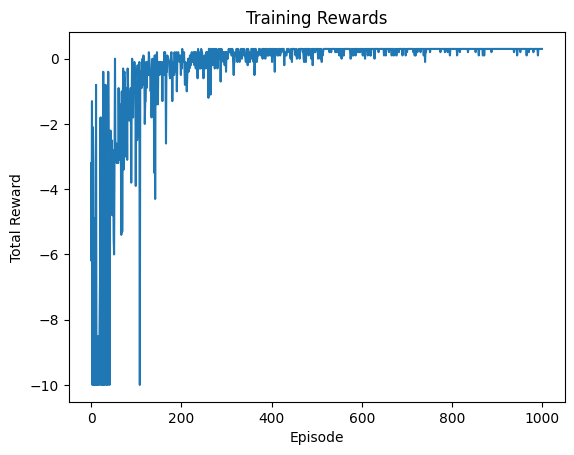

Learned Policy:
S ↓ █ ↓ ←
█ ↓ █ ↓ █
→ → → ↓ █
↑ █ █ → ↓
↑ ← ↑ █ G


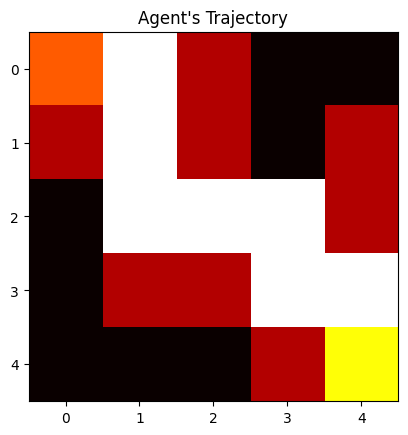

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Train the Q-learning agent
def train_agent(env, agent, episodes=1000, max_steps=100):
    rewards = []

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0

        for step in range(max_steps):
            action = agent.choose_action(state)
            next_state, reward, done, _ = env.step(action)
            agent.update_q_value(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward

            if done:
                break

        agent.decay_epsilon()
        rewards.append(total_reward)

        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}, Epsilon: {agent.epsilon:.4f}")

    return rewards

# Plot the rewards to monitor learning progress
def plot_rewards(rewards):
    plt.plot(rewards)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Training Rewards")
    plt.show()

# Visualize the learned policy
def visualize_policy(agent, env):
    policy = np.zeros_like(env.maze, dtype=str)
    directions = {0: "↑", 1: "→", 2: "↓", 3: "←"}

    for i in range(env.maze.shape[0]):
        for j in range(env.maze.shape[1]):
            if env.maze[i, j] == 1:  # Wall
                policy[i, j] = "█"
            elif env.maze[i, j] == 2:  # Start
                policy[i, j] = "S"
            elif env.maze[i, j] == 3:  # Goal
                policy[i, j] = "G"
            else:
                best_action = np.argmax(agent.q_table[i, j])
                policy[i, j] = directions[best_action]

    print("Learned Policy:")
    for row in policy:
        print(" ".join(row))

# Simulate the agent's trajectory through the maze
def simulate_trajectory(agent, env):
    state = env.reset()
    trajectory = [tuple(state)]

    for _ in range(100):  # Limit steps to avoid infinite loops
        action = np.argmax(agent.q_table[state[0], state[1]])  # Always take the best action
        next_state, _, done, _ = env.step(action)
        trajectory.append(tuple(next_state))
        state = next_state

        if done:
            break

    # Visualize the trajectory
    maze_with_trajectory = env.maze.copy()
    for pos in trajectory:
        if maze_with_trajectory[pos] == 0:  # Mark trajectory on empty spaces
            maze_with_trajectory[pos] = 4

    plt.imshow(maze_with_trajectory, cmap="hot", interpolation="nearest")
    plt.title("Agent's Trajectory")
    plt.show()

# Define the maze
maze = np.array([
    [2, 0, 1, 0, 0],
    [1, 0, 1, 0, 1],
    [0, 0, 0, 0, 1],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 1, 3]
])

# Create the environment
env = CustomMazeEnv(maze)

# Initialize the Q-learning agent
agent = QLearningAgent(env)

# Train the agent
rewards = train_agent(env, agent, episodes=1000, max_steps=100)

# Plot the training rewards
plot_rewards(rewards)

# Visualize the learned policy
visualize_policy(agent, env)

# Simulate and visualize the agent's trajectory
simulate_trajectory(agent, env)

Episode 100/1000, Total Reward: -1.1000000000000005, Epsilon: 0.6058
Episode 200/1000, Total Reward: -0.09999999999999987, Epsilon: 0.3670
Episode 300/1000, Total Reward: 0.30000000000000004, Epsilon: 0.2223
Episode 400/1000, Total Reward: 0.30000000000000004, Epsilon: 0.1347
Episode 500/1000, Total Reward: 0.30000000000000004, Epsilon: 0.0816
Episode 600/1000, Total Reward: 0.30000000000000004, Epsilon: 0.0494
Episode 700/1000, Total Reward: 0.30000000000000004, Epsilon: 0.0299
Episode 800/1000, Total Reward: 0.30000000000000004, Epsilon: 0.0181
Episode 900/1000, Total Reward: 0.30000000000000004, Epsilon: 0.0110
Episode 1000/1000, Total Reward: 0.30000000000000004, Epsilon: 0.0100


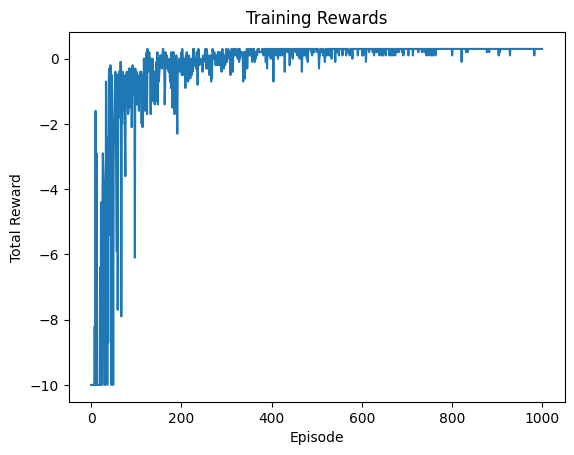

Agent Success Rate: 100.00% (100/100 episodes)
Testing on Original Maze...
Agent Success Rate: 100.00% (100/100 episodes)
Testing on Larger Maze...
Agent Success Rate: 100.00% (100/100 episodes)
Testing on Maze with More Obstacles...
Agent Success Rate: 0.00% (0/100 episodes)

Performance Results:
Original Maze: 100.00%
Larger Maze: 100.00%
Maze with More Obstacles: 0.00%


In [7]:
import numpy as np

def evaluate_agent(agent, env, episodes=100, max_steps=100):
    success_count = 0

    for episode in range(episodes):
        state = env.reset()
        for step in range(max_steps):
            action = np.argmax(agent.q_table[state[0], state[1]])  # Always take the best action
            next_state, _, done, _ = env.step(action)
            state = next_state

            if done:  # Goal reached
                success_count += 1
                break

    success_rate = success_count / episodes * 100
    print(f"Agent Success Rate: {success_rate:.2f}% ({success_count}/{episodes} episodes)")
    return success_rate


def analyze_agent_performance(agent, maze_variations, episodes=100, max_steps=100):
    results = {}

    for maze_name, maze in maze_variations.items():
        print(f"Testing on {maze_name}...")
        env = CustomMazeEnv(maze)
        success_rate = evaluate_agent(agent, env, episodes, max_steps)
        results[maze_name] = success_rate

    return results

# Original maze
maze_original = np.array([
    [2, 0, 1, 0, 0],
    [1, 0, 1, 0, 1],
    [0, 0, 0, 0, 1],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 1, 3]
])

# Larger maze
maze_large = np.array([
    [2, 0, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 0],
    [0, 1, 1, 0, 0, 0, 1],
    [0, 0, 0, 1, 3, 0, 0],
    [0, 1, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0]
])

# Maze with more obstacles
maze_obstacles = np.array([
    [2, 0, 1, 1, 1],
    [1, 0, 1, 0, 1],
    [0, 0, 1, 0, 1],
    [0, 1, 1, 0, 1],
    [0, 0, 0, 1, 3]
])

# Define maze variations
maze_variations = {
    "Original Maze": maze_original,
    "Larger Maze": maze_large,
    "Maze with More Obstacles": maze_obstacles
}

# Create the environment for the original maze
env = CustomMazeEnv(maze_original)

# Initialize the Q-learning agent
agent = QLearningAgent(env)

# Train the agent
rewards = train_agent(env, agent, episodes=1000, max_steps=100)

# Plot the training rewards
plot_rewards(rewards)

# Evaluate the agent on the original maze
evaluate_agent(agent, env, episodes=100, max_steps=100)

# Analyze the agent's performance on different maze configurations
results = analyze_agent_performance(agent, maze_variations, episodes=100, max_steps=100)

# Print the results
print("\nPerformance Results:")
for maze_name, success_rate in results.items():
    print(f"{maze_name}: {success_rate:.2f}%")

Training with Learning Rate: 0.1, Discount Factor: 0.8
Episode 100/500, Total Reward: -3.6999999999999993, Epsilon: 0.6058
Episode 200/500, Total Reward: -0.5000000000000002, Epsilon: 0.3670
Episode 300/500, Total Reward: 0.10000000000000009, Epsilon: 0.2223
Episode 400/500, Total Reward: 0.30000000000000004, Epsilon: 0.1347
Episode 500/500, Total Reward: 0.30000000000000004, Epsilon: 0.0816
Agent Success Rate: 100.00% (100/100 episodes)
Success Rate: 100.00%

Training with Learning Rate: 0.1, Discount Factor: 0.9
Episode 100/500, Total Reward: -0.19999999999999996, Epsilon: 0.6058
Episode 200/500, Total Reward: -0.19999999999999996, Epsilon: 0.3670
Episode 300/500, Total Reward: 0.20000000000000007, Epsilon: 0.2223
Episode 400/500, Total Reward: 1.1102230246251565e-16, Epsilon: 0.1347
Episode 500/500, Total Reward: 0.30000000000000004, Epsilon: 0.0816
Agent Success Rate: 100.00% (100/100 episodes)
Success Rate: 100.00%

Training with Learning Rate: 0.1, Discount Factor: 0.99
Episode 1

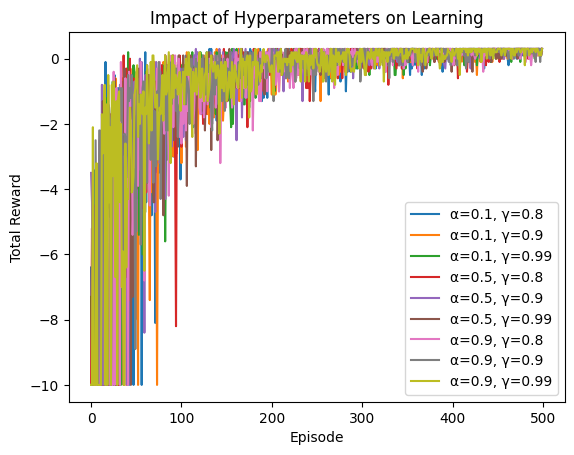

In [8]:
def experiment_hyperparameters(env, learning_rates, discount_factors, episodes=500, max_steps=100):
    results = {}

    for alpha in learning_rates:
        for gamma in discount_factors:
            print(f"Training with Learning Rate: {alpha}, Discount Factor: {gamma}")
            agent = QLearningAgent(env, learning_rate=alpha, discount_factor=gamma)
            rewards = train_agent(env, agent, episodes=episodes, max_steps=max_steps)
            success_rate = evaluate_agent(agent, env, episodes=100, max_steps=max_steps)
            results[(alpha, gamma)] = {
                "rewards": rewards,
                "success_rate": success_rate
            }
            print(f"Success Rate: {success_rate:.2f}%\n")

    return results

# Define hyperparameter ranges
learning_rates = [0.1, 0.5, 0.9]
discount_factors = [0.8, 0.9, 0.99]

# Run experiments
env = CustomMazeEnv(maze_original)  # Use the original maze
hyperparameter_results = experiment_hyperparameters(env, learning_rates, discount_factors)

# Visualize the results
for (alpha, gamma), result in hyperparameter_results.items():
    plt.plot(result["rewards"], label=f"α={alpha}, γ={gamma}")

plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Impact of Hyperparameters on Learning")
plt.legend()
plt.show()

C:\Users\lanaa\AppData\Local\Temp\ipykernel_26364\2847638362.py:59: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  states = torch.tensor(states, dtype=torch.float32).to(self.device)


Episode 100/500, Total Reward: -2.2000000000000015, Epsilon: 0.6058
Episode 200/500, Total Reward: -0.09999999999999987, Epsilon: 0.3670
Episode 300/500, Total Reward: 1.1102230246251565e-16, Epsilon: 0.2223
Episode 400/500, Total Reward: -0.09999999999999987, Epsilon: 0.1347
Episode 500/500, Total Reward: 0.20000000000000007, Epsilon: 0.0816


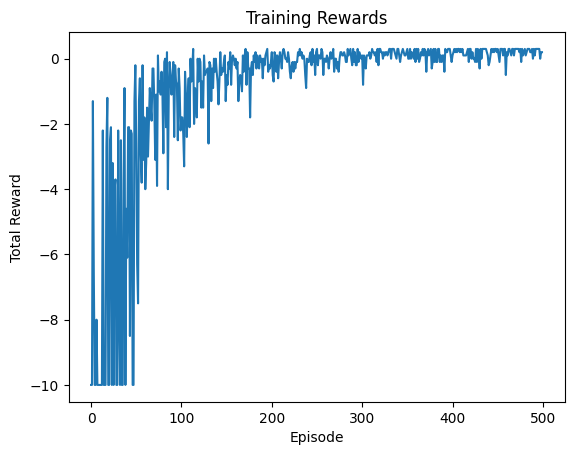

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque

# Define the neural network for Q-value approximation
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# Define the DQN agent
class DQNAgent:
    def __init__(self, env, learning_rate=0.001, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, min_epsilon=0.01):
        self.env = env
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.memory = deque(maxlen=10000)
        self.batch_size = 64

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = DQN(input_dim=env.observation_space.shape[0], output_dim=env.action_space.n).to(self.device)
        self.target_model = DQN(input_dim=env.observation_space.shape[0], output_dim=env.action_space.n).to(self.device)
        self.target_model.load_state_dict(self.model.state_dict())
        self.optimizer = optim.Adam(self.model.parameters(), lr=learning_rate)
        self.loss_fn = nn.MSELoss()

    def choose_action(self, state):
        if random.random() < self.epsilon:
            return self.env.action_space.sample()  # Explore
        else:
            state = torch.tensor(state, dtype=torch.float32).to(self.device)
            with torch.no_grad():
                q_values = self.model(state)
            return torch.argmax(q_values).item()  # Exploit

    def store_transition(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def train(self):
        if len(self.memory) < self.batch_size:
            return

        batch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        states = torch.tensor(states, dtype=torch.float32).to(self.device)
        actions = torch.tensor(actions, dtype=torch.long).to(self.device)
        rewards = torch.tensor(rewards, dtype=torch.float32).to(self.device)
        next_states = torch.tensor(next_states, dtype=torch.float32).to(self.device)
        dones = torch.tensor(dones, dtype=torch.float32).to(self.device)

        # Compute Q-values
        q_values = self.model(states).gather(1, actions.unsqueeze(1)).squeeze(1)
        next_q_values = self.target_model(next_states).max(1)[0]
        target_q_values = rewards + (1 - dones) * self.gamma * next_q_values

        # Update the model
        loss = self.loss_fn(q_values, target_q_values)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_target_model(self):
        self.target_model.load_state_dict(self.model.state_dict())

    def decay_epsilon(self):
        self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)

# Train the DQN agent
def train_dqn_agent(env, agent, episodes=500, max_steps=100, target_update_freq=10):
    rewards = []

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0

        for step in range(max_steps):
            action = agent.choose_action(state)
            next_state, reward, done, _ = env.step(action)
            agent.store_transition(state, action, reward, next_state, done)
            agent.train()
            state = next_state
            total_reward += reward

            if done:
                break

        agent.decay_epsilon()
        rewards.append(total_reward)

        if (episode + 1) % target_update_freq == 0:
            agent.update_target_model()

        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}, Epsilon: {agent.epsilon:.4f}")

    return rewards

# Example usage
env = CustomMazeEnv(maze_original)
agent = DQNAgent(env)
rewards = train_dqn_agent(env, agent, episodes=500, max_steps=100)

# Plot the training rewards
plot_rewards(rewards)